# Finding Heavy Traffic Indicators on I-94

### 1. The I-94 Traffic Dataset:

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Reading from csv file
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
# Displaying head and tail of dataset
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### 2. Analyzing Traffic Volume

First, we want to know the distribution for each traffic volume.

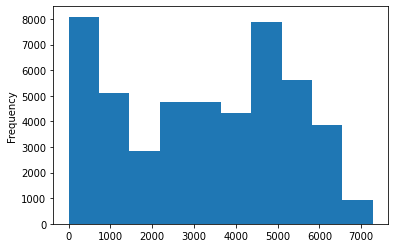

In [6]:
# Examining the distrubution of the "traffic_volume" column
i_94["traffic_volume"].plot.hist()
plt.show()

In [9]:
# Lookup for statistics in datasets
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From this data we know that the most traffic volume in I-94 is 0-1000 and 4000-5000.

### 3. Traffic Volume: Day vs. Night

Previously, we analyzed the distribution of traffic_volume and found the following:

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [10]:
# Transform the date_time column to datetime format
i_94["date_time"] = pd.to_datetime(i_94["date_time"])

In [23]:
# Isolate the daytime and nighttime dataset
day = i_94[(i_94["date_time"].dt.hour >= 7) & (i_94["date_time"].dt.hour < 19)]
night = i_94[(i_94["date_time"].dt.hour < 7) | (i_94["date_time"].dt.hour >= 19)]

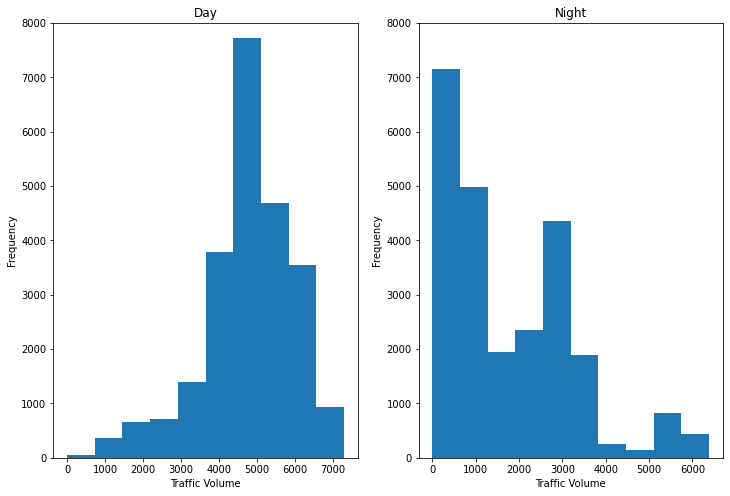

In [37]:
# Creating the grid chart
plt.figure(figsize=(12, 8))

# histogram for day
plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.title("Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0, 8000)

# histogram for night
plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.title("Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0, 8000)

plt.show()

In [41]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [42]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

> #### From above histogram, it can be concluded that **traffic volume in daytime is heavier than in nighttime**

Since the traffic is light at night, we can ignore it and only use day dataset.